In [1]:
import numpy as np
import skimage.io as io
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import json
from pycocotools.coco import COCO
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, os.path.abspath('..'))
# from /home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/src/resize_functions.py import *
from resize_functions import *

In [3]:
bbox_file_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/bbox_crop_shape_gte10k.json'
poly_file_path = '/media/greghovhannisyan/BackupData1/mscoco/annotations/crop_annotations/train2017_crop_bbox_polygons_resized.json'
image_dir_read_path = '/media/greghovhannisyan/BackupData1/mscoco/images/train2017_crop_bbox_resized/'
annFile = '/media/greghovhannisyan/BackupData1/mscoco/annotations/instances/instances_train2017.json'

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.24s)
creating index...
index created!


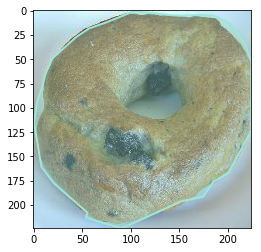

In [6]:
show_image_mask_by_id(coco, '1925493', image_dir_read_path, poly_file_path)

In [13]:
with open(poly_file_path, 'r') as read_file:
    poly_json = json.load(read_file)